g = 100000000000.0
kappa_photon = 152053084433.74597
gamma_acoustic = 267035375.55513242
n_th = 0.0002863124235656597


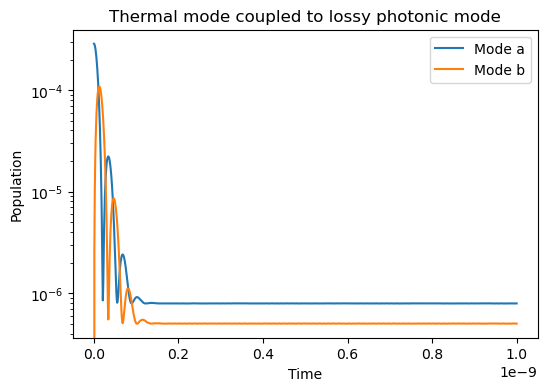

In [37]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, k

# -------------------
# System parameters
# -------------------
w_acoustic = 850e9*2*np.pi
w_photon = 484e12*2*np.pi
Q_acoustic = 10000
Q_photon = 1e4
temperature = 5

N_acoustic = 4  # Fock states for mode a
N_photon = 4  # Fock states for mode b

g = 1e11         # coherent coupling strength a<->b
kappa_photon = w_photon / 2/Q_photon     # loss rate of mode b
gamma_acoustic = w_acoustic / 2/Q_acoustic   # coupling rate of mode a to thermal bath
n_th = 1 / (np.exp(h*w_acoustic/(2*np.pi*k*temperature)) - 1)
print(f"g = {g}")
print(f"kappa_photon = {kappa_photon}")
print(f"gamma_acoustic = {gamma_acoustic}")
print(f"n_th = {n_th}")

# -------------------
# Operators
# -------------------
a = destroy(N_acoustic)
b = destroy(N_photon)

# Tensor operators for full Hilbert space
a_full = tensor(a, qeye(N_photon))
b_full = tensor(qeye(N_acoustic), b)

# -------------------
# Hamiltonian (coherent coupling)
# -------------------
H = g * (a_full.dag() * b_full + a_full * b_full.dag())

# -------------------
# Collapse operators
# -------------------
c_ops = []

# Mode a: thermal bath
c_ops.append(np.sqrt(gamma_acoustic * (n_th + 1)) * a_full)  # emission
c_ops.append(np.sqrt(gamma_acoustic * n_th) * a_full.dag())  # absorption

# Mode b: zero-temperature loss
c_ops.append(np.sqrt(kappa_photon) * b_full)

# -------------------
# Initial state
# -------------------
rho_a0 = thermal_dm(N_acoustic, n_th)  # thermal population in a
rho_b0 = basis(N_photon, 0) * basis(N_photon, 0).dag()  # b starts empty
rho0 = tensor(rho_a0, rho_b0)

# -------------------
# Time evolution
# -------------------
tlist = np.linspace(0, 1e-9, 1000)
result = mesolve(H, rho0, tlist, c_ops, [a_full.dag()*a_full, b_full.dag()*b_full])#, ntraj=100)

# -------------------
# Plot results
# -------------------
plt.figure(figsize=(6,4))
plt.plot(tlist, result.expect[0], label='Mode a')
plt.plot(tlist, result.expect[1], label='Mode b')
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Thermal mode coupled to lossy photonic mode')
plt.legend()
plt.show()


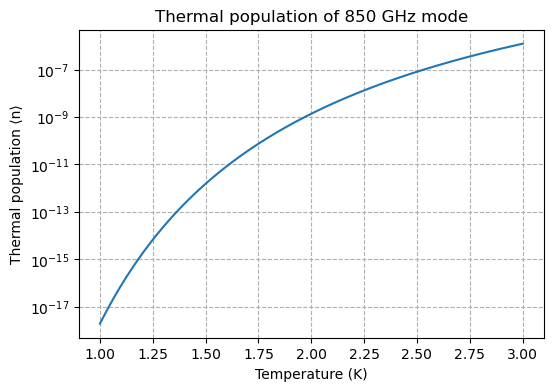

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.constants import h, k
# Constants

# Temperature range
T = np.linspace(1, 3, 500)  # from 1 K to 300 K

# Thermal population
# h = 6.626e-34       # Planck constant, J.s
# kB = 1.381e-23      # Boltzmann constant, J/K
f = 850e9            # frequency in Hz
n_th = 1 / (np.exp(h*f/(k*T)) - 1)

# Plot
plt.figure(figsize=(6,4))
plt.plot(T, n_th)
plt.yscale('log')  # log scale shows low-temperature population clearly
plt.xlabel('Temperature (K)')
plt.ylabel('Thermal population ⟨n⟩')
plt.title('Thermal population of 850 GHz mode')
# plt.xlim(1, 10)
plt.grid(True, which="both", ls="--")
plt.show()
